# Define a connection function with a field output

In this example, we define a function which has a vector input and a field output. The goal of this example is to show how to use the `PointToFieldConnection` to combine two functions. 

## Define the model

In [1]:
from __future__ import print_function
import openturns as ot
import numpy as np

We first define the time grid associated with the model. 

In [2]:
tmin=0.0 # Minimum time
tmax=12. # Maximum time
gridsize=100 # Number of time steps
mesh = ot.IntervalMesher([gridsize-1]).build(ot.Interval(tmin, tmax))

In [3]:
vertices = mesh.getVertices()

Creation of the input distribution.

In [4]:
distZ0 = ot.Uniform(100.0, 150.0)
distV0 = ot.Normal(55.0, 10.0)
distM = ot.Normal(80.0, 8.0)
distC = ot.Uniform(0.0, 30.0)
distribution = ot.ComposedDistribution([distZ0, distV0, distM, distC])

In [5]:
dimension = distribution.getDimension()
dimension

4

Then we define the Python function which computes the altitude at each time value. This function has 5 inputs: `z0`, `v0`, `m`, `c` and `zmin`. 

In [6]:
def AltiFunc(X):
    g  = 9.81
    z0 = X[0]
    v0 = X[1]
    m  = X[2]
    c  = X[3]
    zmin  = X[4]
    tau = m / c
    vinf = - m * g / c
    t = np.array(vertices)
    z = z0 + vinf * t + tau * (v0 - vinf) * (1 - np.exp( - t / tau))
    z = np.maximum(z,zmin)
    return [[zeta[0]] for zeta in z]

In [7]:
outputDimension = 1
altitudeWithFiveInputs = ot.PythonPointToFieldFunction(5, mesh, outputDimension, AltiFunc)

## Restrict the number of inputs

We define a function which has 4 inputs and 5 outputs: the 5th ouput `zmin` is set to zero. 

In [8]:
projectionFunction = ot.SymbolicFunction(["z0", "v0", "m", "c"], ["z0", "v0", "m", "c", "0.0"])

Then we use the `PointToFieldConnection` to create a function which has 4 inputs and returns the output field.

In [9]:
altitudeWithFourInputs = ot.PointToFieldConnection(altitudeWithFiveInputs, projectionFunction)

## Sample trajectories 

In order to sample trajectories, we use the `getSample` method of the input distribution and apply the field function.

In [10]:
size = 10
inputSample = distribution.getSample(size)
outputSample = altitudeWithFourInputs(inputSample)

Draw some curves.

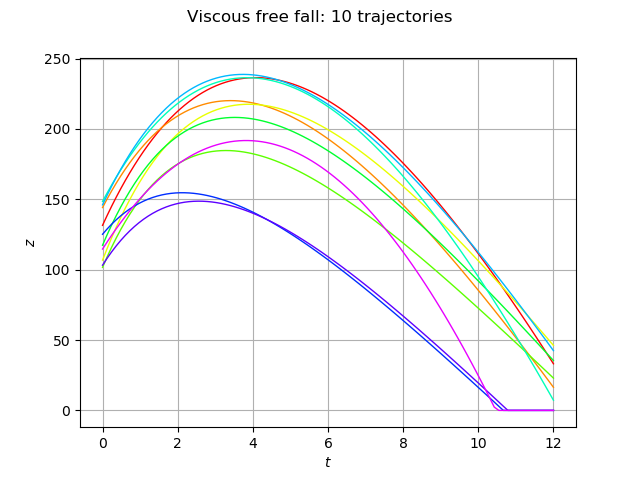

In [11]:
graph = outputSample.drawMarginal(0)
graph.setTitle('Viscous free fall: %d trajectories' % (size))
graph.setXTitle(r'$t$')
graph.setYTitle(r'$z$')
graph